In [1]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 17.7 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 32.9 MB/s  0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ---------------------------- ----------- 21.8/30.3 MB 98.2 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 83.5 MB/s  0:00:00

   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [l

In [2]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = load_breast_cancer()

In [4]:
X, y = data['data'], data['target']

In [5]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [8]:
clf.score(X_test, y_test)

0.9649122807017544

In [9]:
clf.predict([X_test[0]])

array([0])

In [ ]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10)) # Utilizamos o KMeans que utiliza 10 centróides como base de referência para as explicações.

In [11]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 114/114 [00:05<00:00, 20.94it/s]


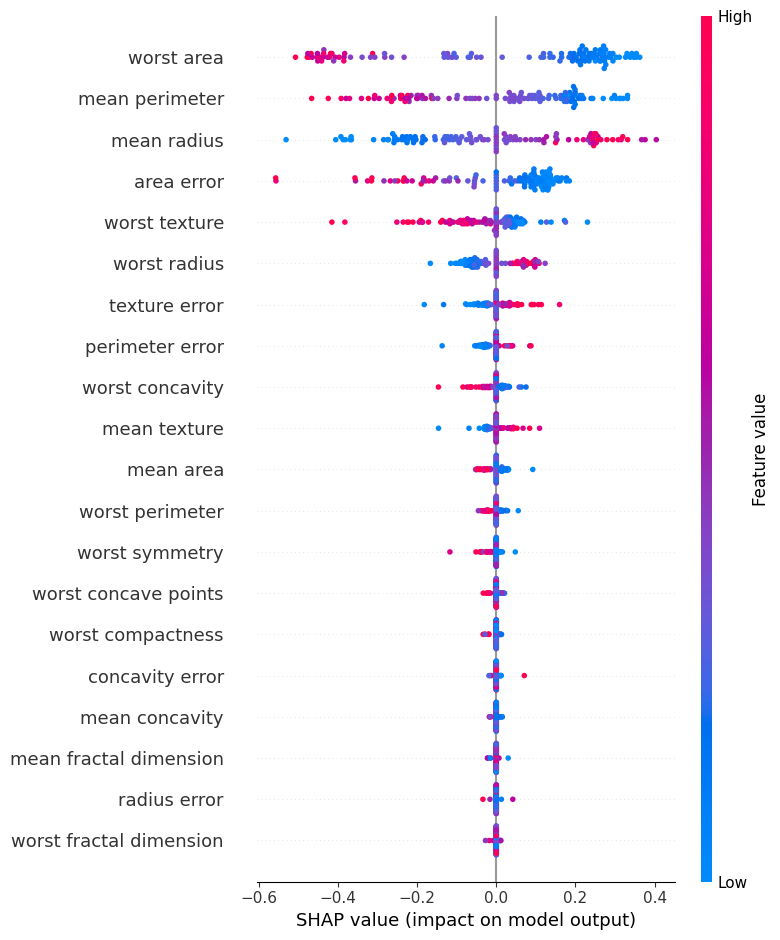

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])
# Aqui temos um gráfico de resumo que mostra a importância das características em todo o conjunto de teste.
# Quanto mais para cima a característica estiver, mais decisiva ela é para o modelo.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=data['feature_names']) # Aqui temos a explicação para a primeira amostra do conjunto de teste.
# Conseguimos ver como cada característica contribui para a decisão do modelo.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test[1], feature_names=data['feature_names']).save_html("shap_example.html") # Salvamos a explicação para a segunda amostra do conjunto de teste em um arquivo HTML.

In [ ]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

In [16]:
feature_names = data['feature_names']
feature_importance = sorted(zip(feature_names, mean_abs_shap_values), key=lambda x: x[1], reverse=True)

In [17]:
feature_importance

[(np.str_('worst area'), np.float64(0.2671292301015434)),
 (np.str_('mean perimeter'), np.float64(0.17952684452723594)),
 (np.str_('mean radius'), np.float64(0.1744571975261854)),
 (np.str_('area error'), np.float64(0.1308009813301619)),
 (np.str_('worst texture'), np.float64(0.07169389329572391)),
 (np.str_('worst radius'), np.float64(0.0580320107536249)),
 (np.str_('texture error'), np.float64(0.027829840552844945)),
 (np.str_('perimeter error'), np.float64(0.017869227151561112)),
 (np.str_('worst concavity'), np.float64(0.01602830429375967)),
 (np.str_('mean texture'), np.float64(0.015486806691939881)),
 (np.str_('mean area'), np.float64(0.014891916666991058)),
 (np.str_('worst perimeter'), np.float64(0.007885132102083036)),
 (np.str_('worst symmetry'), np.float64(0.005518701459614013)),
 (np.str_('worst concave points'), np.float64(0.002970708347216092)),
 (np.str_('worst compactness'), np.float64(0.0019873350291733237)),
 (np.str_('concavity error'), np.float64(0.00151654750743355

In [18]:
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

worst area: 0.2671
mean perimeter: 0.1795
mean radius: 0.1745
area error: 0.1308
worst texture: 0.0717
worst radius: 0.0580
texture error: 0.0278
perimeter error: 0.0179
worst concavity: 0.0160
mean texture: 0.0155
mean area: 0.0149
worst perimeter: 0.0079
worst symmetry: 0.0055
worst concave points: 0.0030
worst compactness: 0.0020
concavity error: 0.0015
mean concavity: 0.0011
mean fractal dimension: 0.0010
radius error: 0.0009
worst fractal dimension: 0.0008
concave points error: 0.0008
mean smoothness: 0.0006
fractal dimension error: 0.0006
compactness error: 0.0006
smoothness error: 0.0005
mean symmetry: 0.0005
mean concave points: 0.0004
worst smoothness: 0.0004
symmetry error: 0.0003
mean compactness: 0.0002
